In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import average_precision_score, precision_score, recall_score
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:

pred_path = '/content/drive/Shareddrives/AC297r Project - RFCx /model/model_aug_all_jack/prediction_label_val.csv' 
pred_df = pd.read_csv(pred_path, index_col=False)
data_dir = "/content/drive/Shareddrives/AC297r Project - RFCx /image_data/puerto-rico/train/audio"
class_list = ['Coereba_flaveola', 'Eleutherodactylus_coqui', 'Spindalis_portoricensis', 'Contopus_latirostris_blancoi',
              'Eleutherodactylus_antillensis', 'Amazona_vittata', 'Setophaga_discolor', 'Margarops_fuscatus', 'Melopyrrha_portoricensis',
              'Eleutherodactylus_brittoni', 'Geotrygon_montana', 'Myiarchus_antillarum', 'Pluvialis_squatarola', 'Patagioenas_leucocephala',
              'Buteo_platypterus', 'Coccyzus_vieilloti', 'Lithobates_catesbeianus', 'Setophaga_petechia', 'Icterus_icterus',
              'Crotophaga_ani', 'Antrostomus_noctitherus', 'Eleutherodactylus_cochranae', 'Eleutherodactylus_wightmanae',
              'Setophaga_adelaidae', 'Patagioenas_squamosa', 'Nesospingus_speculiferus', 'Melanerpes_portoricensis',
              'Leptodactylus_albilabris', 'Rhinella_marina', 'Megascops_nudipes', 'Setophaga_angelae', 'Eleutherodactylus_richmondi',
              'Eleutherodactylus_hedricki', 'Eleutherodactylus_gryllus', 'Osteopilus_septentrionalis', 'Turdus_plumbeus',
              'Vireo_latimeri', 'Eleutherodactylus_unicolor', 'Chordeiles_gundlachii', 'Vireo_altiloquus', 'Eleutherodactylus_cooki',
              'Eleutherodactylus_portoricensis', 'Molothrus_bonariensis', 'Todus_mexicanus', 'Buteo_jamaicensis']

pred_df_p = pred_df[pred_df["Real Label"]>=0]
pred_df_n = pred_df[pred_df["Real Label"]==-1]
pred_df.head()

,Real Label,Coereba_flaveola,Eleutherodactylus_coqui,Spindalis_portoricensis,Contopus_latirostris_blancoi,Eleutherodactylus_antillensis,Amazona_vittata,Setophaga_discolor,Margarops_fuscatus,Melopyrrha_portoricensis,...,Turdus_plumbeus,Vireo_latimeri,Eleutherodactylus_unicolor,Chordeiles_gundlachii,Vireo_altiloquus,Eleutherodactylus_cooki,Eleutherodactylus_portoricensis,Molothrus_bonariensis,Todus_mexicanus,Buteo_jamaicensis
0,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [10]:
pred_prob_path = '/content/drive/Shareddrives/AC297r Project - RFCx /model/model_aug_all_jack/prediction_prob_val.csv' 
pred_prob_df = pd.read_csv(pred_prob_path, index_col=False)
data_dir = "/content/drive/Shareddrives/AC297r Project - RFCx /image_data/puerto-rico/train/audio"

pred_prob_df_p = pred_prob_df[pred_prob_df["Real Label"]>=0]
pred_prob_df_n = pred_prob_df[pred_prob_df["Real Label"]==-1]
pred_prob_df.head()

,Real Label,Coereba_flaveola,Eleutherodactylus_coqui,Spindalis_portoricensis,Contopus_latirostris_blancoi,Eleutherodactylus_antillensis,Amazona_vittata,Setophaga_discolor,Margarops_fuscatus,Melopyrrha_portoricensis,...,Turdus_plumbeus,Vireo_latimeri,Eleutherodactylus_unicolor,Chordeiles_gundlachii,Vireo_altiloquus,Eleutherodactylus_cooki,Eleutherodactylus_portoricensis,Molothrus_bonariensis,Todus_mexicanus,Buteo_jamaicensis
0,28.0,0.000333,0.000933,0.000143,0.000693,0.004055,0.000863,0.000762,0.000205,0.000041,...,0.000185,0.001415,0.000523,0.000469,0.015839,0.000540,0.000175,0.000659,0.003960,0.003899
1,-1.0,0.005383,0.001280,0.003624,0.002705,0.007881,0.010864,0.005600,0.000514,0.001861,...,0.000367,0.010773,0.022583,0.001169,0.100159,0.001700,0.014839,0.001090,0.007374,0.010818
2,1.0,0.000437,0.174316,0.000134,0.000918,0.030502,0.000473,0.000575,0.000242,0.000027,...,0.000098,0.001187,0.002483,0.000511,0.005959,0.000873,0.000361,0.000840,0.003708,0.002642
3,-1.0,0.000436,0.001561,0.000138,0.000712,0.003721,0.000365,0.003376,0.000480,0.000125,...,0.000129,0.018295,0.001202,0.006851,0.013687,0.001134,0.000100,0.002108,0.031616,0.006824
4,37.0,0.001405,0.003136,0.000138,0.000517,0.007965,0.003525,0.001383,0.000649,0.000046,...,0.000276,0.004166,0.557129,0.000955,0.008003,0.003443,0.011551,0.001265,0.012962,0.005203


## How many number of classes is in each record? 

Text(0.5, 1.0, 'Histogram of Number of Classes Predicted by Each record')

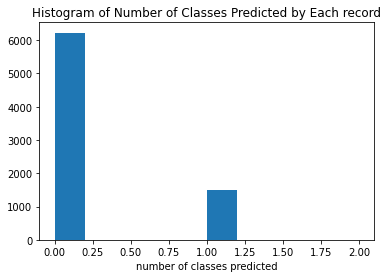

In [ ]:
plt.hist(pred_df.iloc[:,1::].sum(axis=1))
plt.xlabel("number of classes predicted")
plt.title("Histogram of Number of Classes Predicted by Each record")

In [ ]:
print(f"The ratio of sample that are predicted as more than 1 class is {(pred_df.iloc[:,1::].sum(axis=1)>=2).sum() /pred_df.shape[0]:3f}")

The ratio of sample that are predicted as more than 1 class is 0.000777


In [ ]:
def plot_metric_class(pred_df, metric):
    plt.figure(figsize=(14, 10))
    output =  metric(pred_df)[1]
    output = dict(sorted(output.items(), key = lambda x: x[1], reverse = True))
    sns.barplot(y = list(output.keys()), x = list(output.values()), orient = "h")

## Precision

In [4]:
def precision(pred_df):
    y_true_label = np.zeros(pred_df.shape)
    y_true_label[np.arange(pred_df.shape[0]), 1+pred_df["Real Label"].astype(int)] = 1.0
    y_true_label = y_true_label[:,1::]
    y_pred = np.array(pred_df.iloc[:,1::])
    scores = {}
    for i in range(y_pred.shape[1]):
        if(y_pred[:,i].sum() >0):  # get rid of columns that have no positive prediction
            scores[pred_df.columns[1:][i]] = precision_score(y_true_label[:,i], y_pred[:,i])
    return round(sum(scores.values())/len(scores),5), scores

In [13]:
# positive samples
print("Precision is", precision(pred_df)[0])

Precision is 0.83959


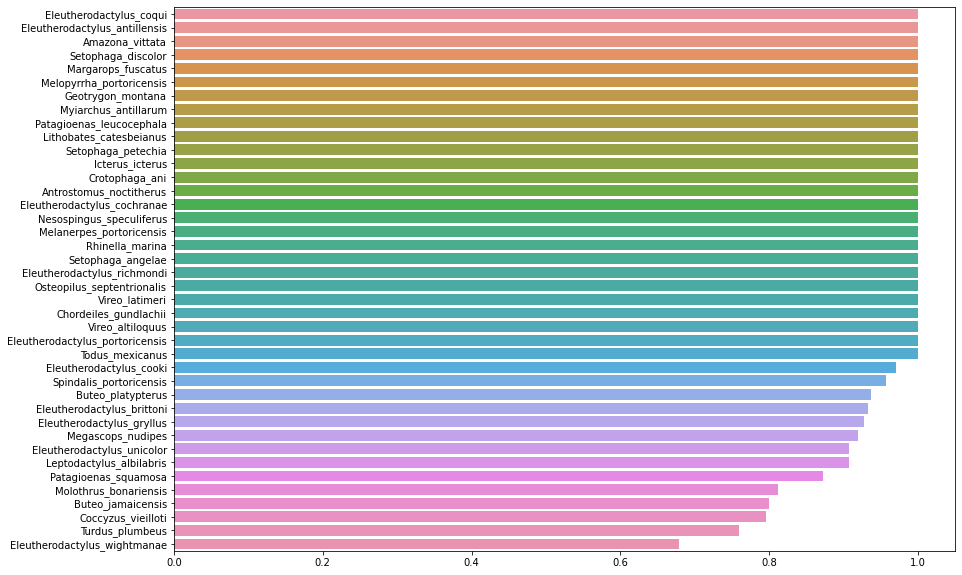

In [ ]:
plot_metric_class(pred_df, precision)

## Recall

In [8]:
def recall(pred_df, state = 'p'): # df should have real label on the first columns
    if state == 'p':
        y_true_label = np.zeros(pred_df.shape)
        y_true_label[np.arange(pred_df.shape[0]), 1+pred_df["Real Label"].astype(int)] = 1.0
        y_true_label = y_true_label[:,1::]
        y_pred = np.array(pred_df.iloc[:,1::])
        scores ={}
        for i in range(y_pred.shape[1]): 
            scores[pred_df.columns[1:][i]] = recall_score(y_true_label[:,i], y_pred[:,i])
        return round(sum(scores.values())/len(scores),5), scores
#         return round(np.mean(pred_df.values[range(pred_df.shape[0]), pred_df["Real Label"]+1]),3)
    elif state == 'n':
        return round(np.mean(pred_df.iloc[:, 1::].sum(axis=1) == 0),5)

In [14]:
print("Fractions of positive samples with correct predicted class ", recall(pred_df_p, 'p')[0])

print("Fractions of negative samples with correct predicted class ", recall(pred_df_n, 'n'))

Fractions of positive samples with correct predicted class  0.35954
Fractions of negative samples with correct predicted class  0.95067


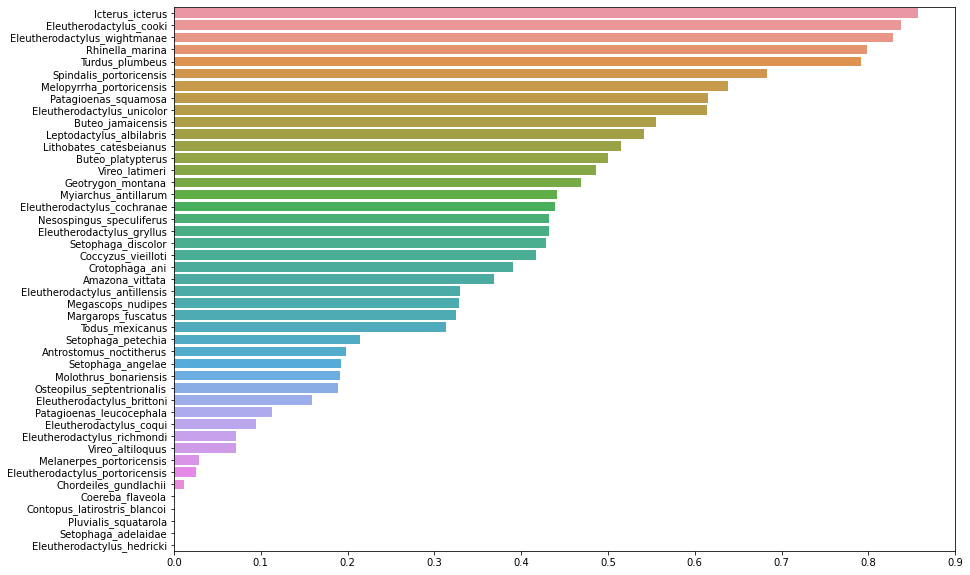

In [ ]:
plot_metric_class(pred_df_p, recall)

## Map /  Mean Average Precision

In [6]:
def mAP(pred_prob_df): #pred_prob_df
    y_true = np.zeros(pred_prob_df.shape)
    y_true[np.arange(pred_prob_df.shape[0]), 1+pred_prob_df["Real Label"].astype(int)] = 1.0
    y_true = y_true[:,1::]
    y_pred = np.array(pred_prob_df.iloc[:,1::])
    return round(average_precision_score(y_true, y_pred),5)   

In [15]:
print("mAP is", mAP(pred_prob_df))

mAP is 0.73592
